In [2]:
import iris

In [3]:
data = iris.load('/g/data1/w40/mxj563/UM/u-ag055/share/cycle/20150129T1500Z/darwin/4km/singv_2p1/ics/singv_2p1_astart')

/short/w35/saw562/conda/envs/swc-climatedata/lib/python3.5/site-packages/iris/fileformats/_ff.py:740: UserWarning: The stash code m01s00i060 is on a grid 22 which has not been explicitly handled by the fieldsfile loader. Assuming the data is on a P grid.
  subgrid))


In [8]:
data

[<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (pseudo_level: 9; latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (pseudo_level: 5; latitude: 270; longitude: 450)>,
<iris 'Cube' of unknown / (unknown) (pseudo_level: 9; l

In [9]:
# load returns a custom list of fields, can be indexed or iterated over

data[-1]

<iris 'Cube' of y_wind / (m s-1) (model_level_number: 80; latitude: 271; longitude: 450)>

In [4]:
# You can also filter the list with `extract()`

y_wind = data.extract('y_wind')[0]
print(y_wind)

y_wind / (m s-1)                    (model_level_number: 80; latitude: 271; longitude: 450)
     Dimension coordinates:
          model_level_number                           x             -               -
          latitude                                     -             x               -
          longitude                                    -             -               x
     Auxiliary coordinates:
          level_height                                 x             -               -
          sigma                                        x             -               -
          surface_altitude                             -             x               x
     Derived coordinates:
          altitude                                     x             x               x
     Scalar coordinates:
          time: 2015-01-29 15:00:00
     Attributes:
          STASH: m01s00i003
          source: Data from Met Office Unified Model
          um_version: 10.4


In [12]:
y_wind?

In [22]:
# Index like an array

print(y_wind[0,:,:])

y_wind / (m s-1)                    (latitude: 271; longitude: 450)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Auxiliary coordinates:
          surface_altitude                   x               x
     Derived coordinates:
          altitude                           x               x
     Scalar coordinates:
          level_height: 2.49993513 m, bound=(0.0, 4.9998718) m
          model_level_number: 1
          sigma: 0.999714858094, bound=(1.0, 0.999429756672)
          time: 2015-01-29 15:00:00
     Attributes:
          STASH: m01s00i003
          source: Data from Met Office Unified Model
          um_version: 10.4


In [35]:
# Apply constraints

darwin_location = iris.Constraint(latitude=lambda x: -12.4634<x<12.4646, longitude=lambda x: 130.845<x<131.846)
darwin = y_wind.extract(darwin_location)
print(darwin)

y_wind / (m s-1)                    (model_level_number: 80; latitude: 161; longitude: 28)
     Dimension coordinates:
          model_level_number                           x             -               -
          latitude                                     -             x               -
          longitude                                    -             -               x
     Auxiliary coordinates:
          level_height                                 x             -               -
          sigma                                        x             -               -
          surface_altitude                             -             x               x
     Derived coordinates:
          altitude                                     x             x               x
     Scalar coordinates:
          time: 2015-01-29 15:00:00
     Attributes:
          STASH: m01s00i003
          source: Data from Met Office Unified Model
          um_version: 10.4


In [12]:
# Reduce a cube

vertical_mean = y_wind.collapsed('model_level_number', iris.analysis.MEAN)
print(vertical_mean)

y_wind / (m s-1)                    (latitude: 271; longitude: 450)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Auxiliary coordinates:
          surface_altitude                   x               x
     Derived coordinates:
          altitude                           x               x
     Scalar coordinates:
          level_height: 19250.0 m, bound=(0.0, 38500.0) m
          model_level_number: 40, bound=(1, 80)
          sigma: 0.5, bound=(0.0, 1.0)
          time: 2015-01-29 15:00:00
     Attributes:
          STASH: m01s00i003
          source: Data from Met Office Unified Model
          um_version: 10.4
     Cell methods:
          mean: model_level_number


/short/w35/saw562/conda/envs/swc-climatedata/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))


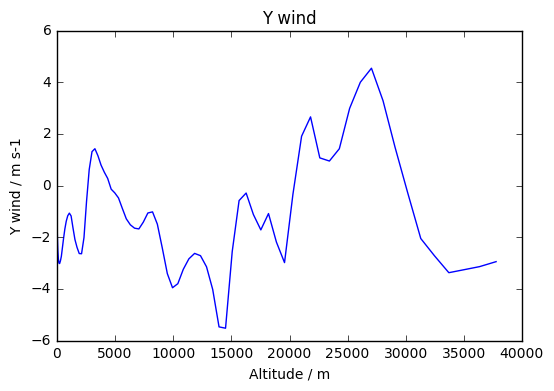

In [38]:
# Plot a cube

%matplotlib inline
import matplotlib.pyplot as plt
import iris.quickplot as iplot
iplot.plot(darwin[:,0,0])

/short/w35/saw562/conda/envs/swc-climatedata/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


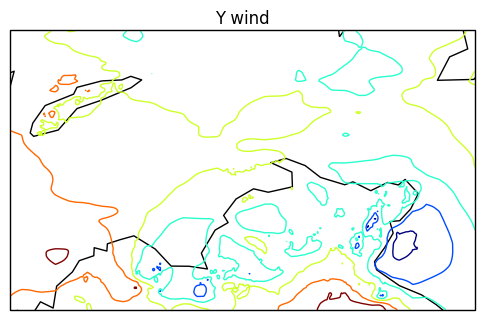

In [39]:
iplot.contour(y_wind[0,:,:])
plt.gca().coastlines()

In [57]:
# Convert UM format to Netcdf

iris.save(y_wind, 'iris.nc')

/short/w35/saw562/conda/envs/swc-climatedata/lib/python3.5/site-packages/iris/fileformats/netcdf.py:2026: IrisDeprecation: NetCDF default saving behaviour currently assigns the outermost dimensions to unlimited. This behaviour is to be deprecated, in favour of no automatic assignment. To switch to the new behaviour, set iris.FUTURE.netcdf_no_unlimited to True.
  warn_deprecated(msg)


In [58]:
! ncdump -h iris.nc

netcdf iris {
dimensions:
	model_level_number = UNLIMITED ; // (80 currently)
	latitude = 271 ;
	longitude = 450 ;
	bnds = 2 ;
variables:
	float y_wind(model_level_number, latitude, longitude) ;
		y_wind:_FillValue = -1.073742e+09f ;
		string y_wind:standard_name = "y_wind" ;
		string y_wind:units = "m s-1" ;
		string y_wind:um_stash_source = "m01s00i003" ;
		string y_wind:grid_mapping = "latitude_longitude" ;
		string y_wind:coordinates = "level_height sigma surface_altitude time" ;
	int latitude_longitude ;
		string latitude_longitude:grid_mapping_name = "latitude_longitude" ;
		latitude_longitude:longitude_of_prime_meridian = 0. ;
		latitude_longitude:earth_radius = 6371229. ;
	int64 model_level_number(model_level_number) ;
		string model_level_number:axis = "Z" ;
		string model_level_number:units = "1" ;
		string model_level_number:standard_name = "model_level_number" ;
		string model_level_number:positive = "up" ;
	float latitude(latitude) ;
		string latitude:axis = "Y" ;
		string

In [1]:
# Interactive plots

import xarray
import holoviews
import geoviews
import geoviews.feature

holoviews.notebook_extension()

b':HoloMap   [model_level_number]\n   :Overlay\n      .Y_wind.I    :Image   [longitude,latitude]   (y_wind)\n      .Coastline.I :Feature   [Longitude,Latitude]'
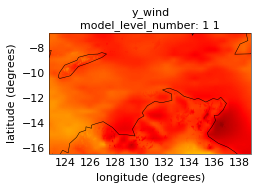
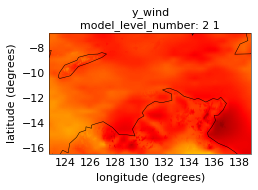
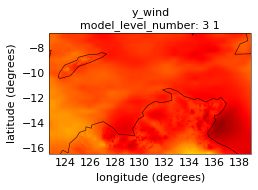
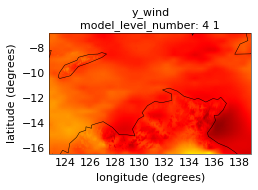
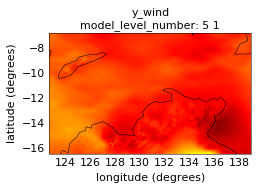
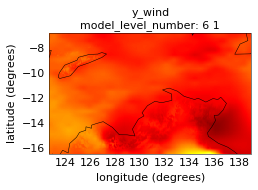
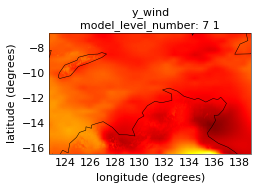
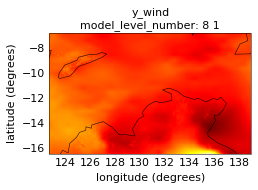
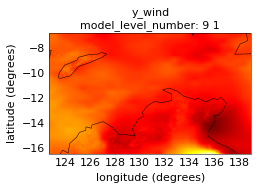
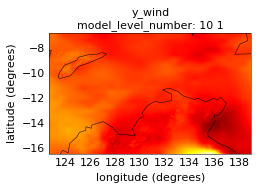
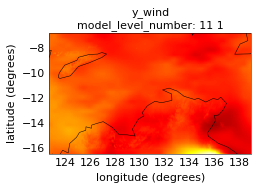
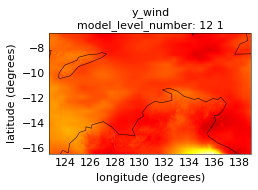
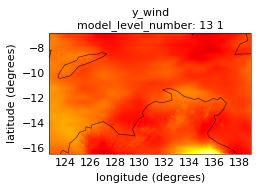
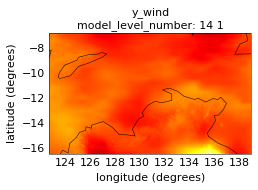
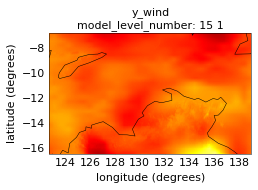
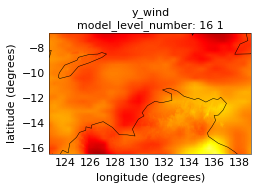
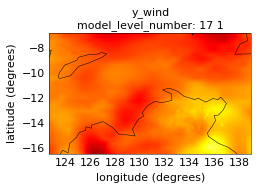
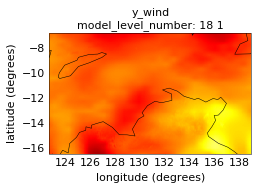
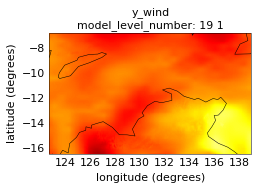
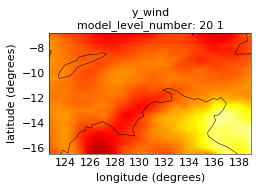
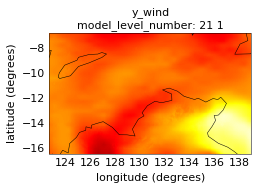
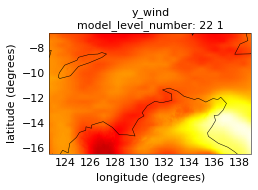
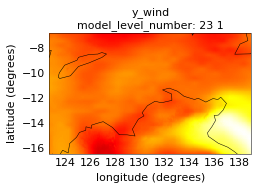
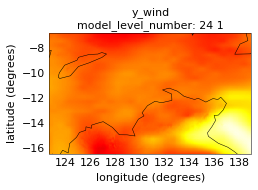
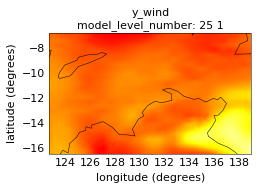
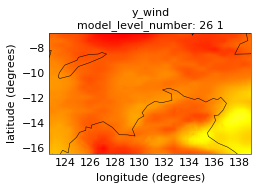
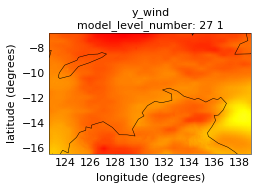
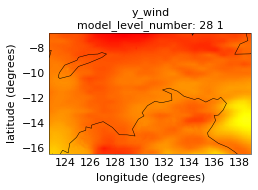
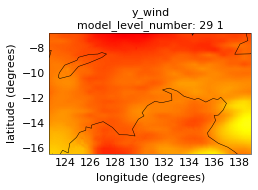
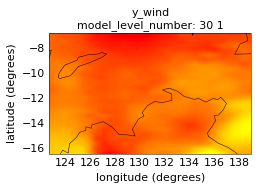
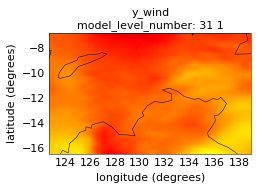
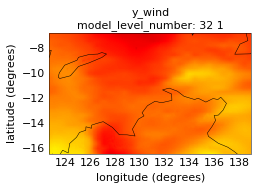
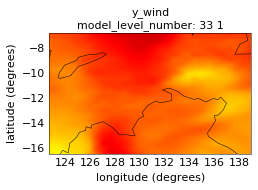
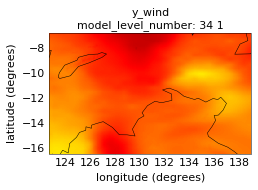
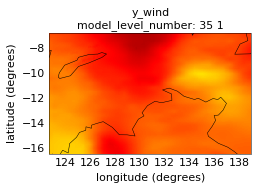
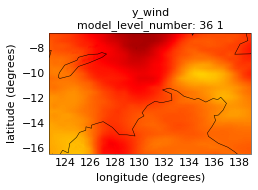
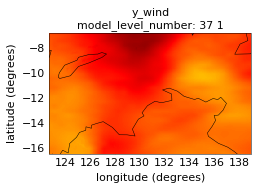
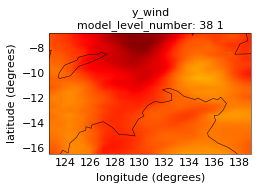
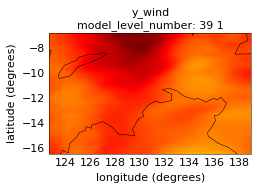
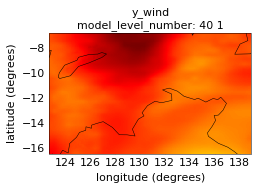
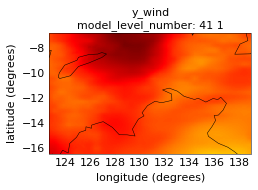
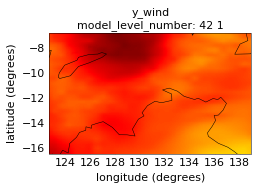
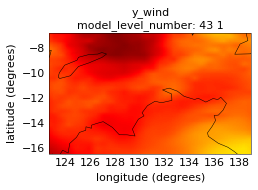
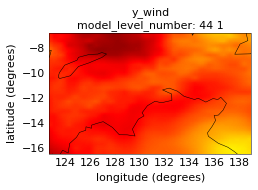
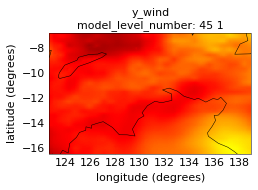
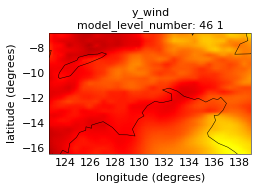
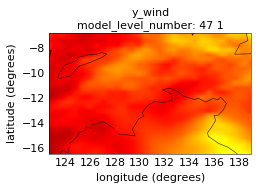
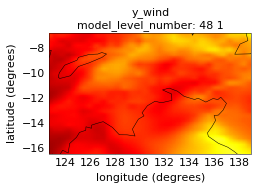
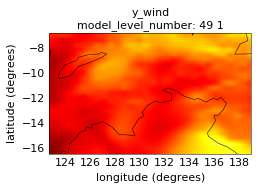
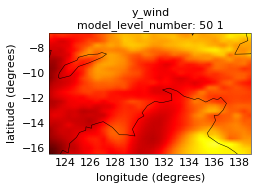
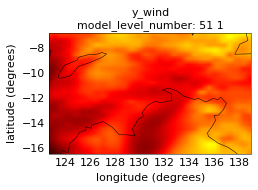
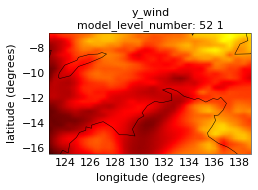
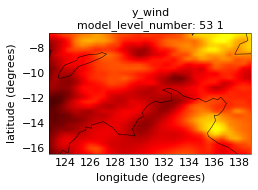
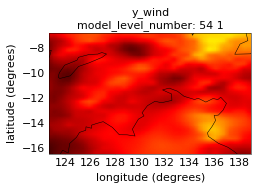
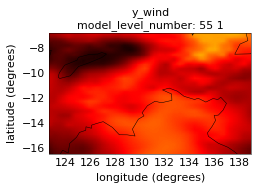
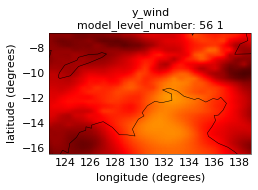
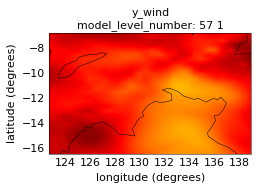
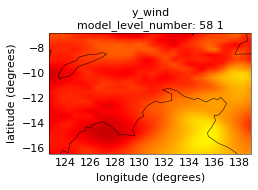
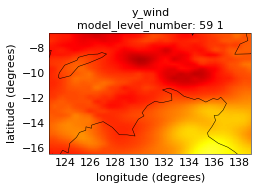
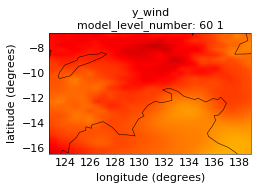
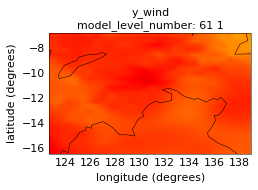
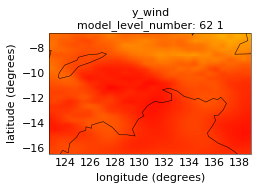
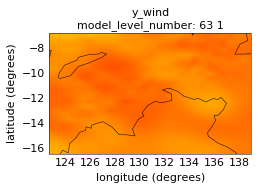
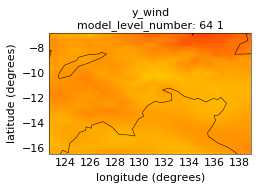
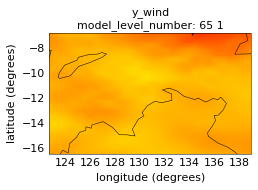
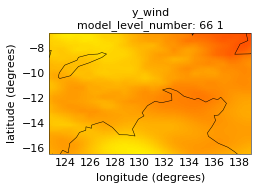
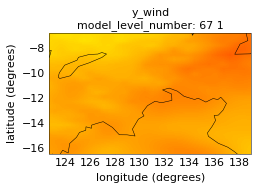
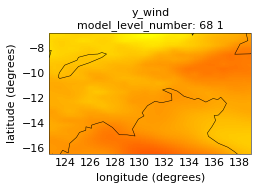
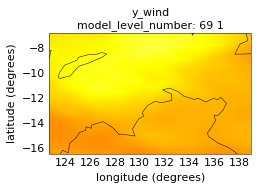
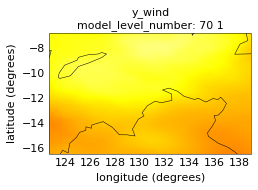
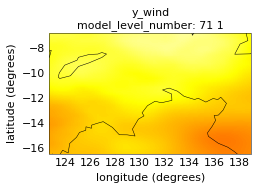
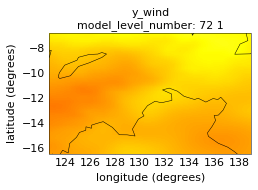
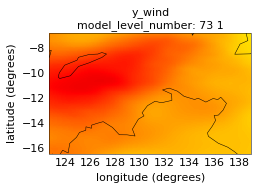
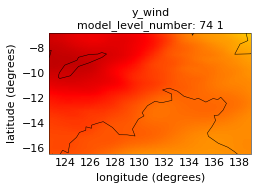
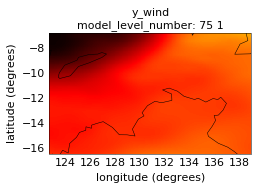
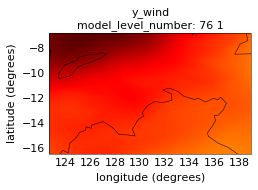
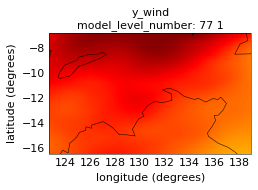
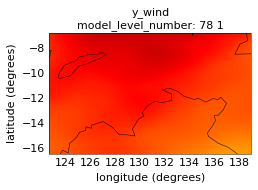
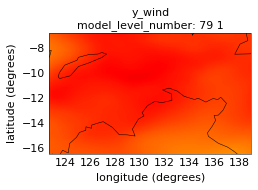
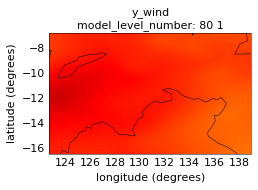

In [8]:
dataset = geoviews.Dataset(y_wind)
dataset.to(geoviews.Image, ['longitude','latitude']) * geoviews.feature.coastline